# Modeling Notebook

In [20]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
   
#Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, recall_score, precision_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

pd.set_option('display.max_colwidth' ,999)

In [2]:
#import downsampled dataframes
preg_df = pd.read_csv('./data/downsampled_data/preg_downsample.csv')
parent_df =pd.read_csv('./data/downsampled_data/parent_downsample.csv')

In [3]:
preg_df.drop(columns= 'Unnamed: 0', inplace=True)
parent_df.drop(columns= 'Unnamed: 0', inplace= True)

In [4]:
preg_parent_df = preg_parent_df = pd.concat([preg_df, parent_df])
#preg_parent_df.head(1)
#check data loded

In [5]:
preg_parent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lems        50000 non-null  object 
 1   selftext    50000 non-null  object 
 2   title       50000 non-null  object 
 3   title_lems  50000 non-null  object 
 4   author      50000 non-null  object 
 5   subreddit   50000 non-null  object 
 6   all_lems    50000 non-null  object 
 7   word_count  50000 non-null  float64
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [6]:
#baseline model
preg_parent_df['subreddit'].value_counts(normalize=True)

pregnant     0.5
Parenting    0.5
Name: subreddit, dtype: float64

In [7]:
#changing subreddit to 0 and 1 for modeling
preg_parent_df['subreddit'] = preg_parent_df['subreddit'].map({'pregnant' : 0, 'Parenting' : 1})

In [10]:
#export out for use later
#preg_parent_df.to_csv('./data/preg_parent_downsample.csv')

## Train, Test, Split
* Opting for a 33% : 66% test : train split on the data to give the training data the majority to learn and train on.

In [9]:
X = preg_parent_df['all_lems']
y = preg_parent_df['subreddit']

In [10]:
#Setting training and testing split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .33,
                                                    stratify= y, random_state= 37)

In [11]:
#Count Vectorizer to change the textual data into vectors for use in the modeling
cvec = CountVectorizer(stop_words= 'english', min_df= 2)
cvec.fit(X_train)
cvec_text = cvec.transform(X_train)
cvec_text_df = pd.DataFrame(cvec_text.todense(), columns= cvec.get_feature_names())

In [12]:
#dataframe of the vector for each lem
cvec_text_df['subreddit_values'] = y_train.values
cvec_text_df.head(3)

,00,000,00am,00pm,01,02,0230,03,03pm,04,...,zygote,zyrtec,الحامل,الحمل,على,في,للحامل,من,هي,subreddit_values
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
tfidf = TfidfVectorizer(min_df=2, stop_words= 'english')
tfidf.fit(X_train)

TfidfVectorizer(min_df=2, stop_words='english')

In [14]:
tfidf_text    = tfidf.transform(X_train)
tfidf_text_df = pd.DataFrame(tfidf_text.todense(), columns= tfidf.get_feature_names()) 

In [15]:
vocab = tfidf.get_feature_names()
len(vocab)

20568

In [16]:
len(tfidf.idf_)

20568

In [17]:
idf_df = pd.DataFrame(zip(vocab, tfidf.idf_), columns= ['Vocabularly', 'IDF'])

In [18]:
idf_df.sort_values(by = 'IDF').head() 

,Vocabularly,IDF
10491,just,1.603145
19822,wa,1.773707
10982,like,1.830691
8752,ha,1.942634
20010,week,1.952644


In [19]:
idf_df.sort_values(by = 'IDF').tail()

,Vocabularly,IDF
6598,eilish,10.320718
6599,einstein,10.320718
6600,eip,10.320718
6591,ehh,10.320718
20567,هي,10.320718


## Modeling

### Model 1 Logistic Regression and Count Vectorizer

In [20]:
#Model with Log Reg and Count Vectorizer
#pipe = Pipeline([
 #   ('cv', CountVectorizer()),
  #  ('lr', LogisticRegressionCV(solver='liblinear'))
#])

In [35]:
#pipe.fit(X_train, y_train)

Wall time: 0 ns


In [35]:
#pipe.score(X_train, y_train) , pipe.score(X_test, y_test)

(0.9681492537313433, 0.9502424242424242)

#### Model 1 Interpretation
* Countvectorizer and Logistic Regression appear to be performing very well!
* We are bit overfit by about 1.8% from train to test, but that's still really good.

### Model 2 Naive Bayes and Tfidf Vectorizer

In [36]:
#pipe_2 = Pipeline([
 #   ('tfidf', TfidfVectorizer()),
  #  ('nb', MultinomialNB())
#])

In [37]:
#pipe_2.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [38]:
#pipe_2.score(X_train, y_train), pipe_2.score(X_test, y_test)

(0.9311940298507463, 0.9167878787878788)

#### Model 2 Interpretation
* Tfidf Vectorizer and Naive Bayes appear to also perform well, though not as strong as Logistic Regression and Count Vectorizer
* We are bit overfit by about 1.5% from train to test, but that's still rather good.

### Model 3 Logistic Regression and Tfidf Vectorizer

In [21]:
pipe_3 = Pipeline([('tfidf', TfidfVectorizer()), ('lr', LogisticRegressionCV(solver= 'liblinear'))])

In [22]:
pipe_3.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegressionCV(solver='liblinear'))])

In [23]:
pipe_3.score(X_train, y_train) , pipe_3.score(X_test, y_test)

(0.9717313432835821, 0.952060606060606)

In [24]:
predicts = pipe_3.predict(X_test)

#### Model 3 Interpretation
* Pairing Tfidf Vectorizer with Logistic Regression appears to give the best score so far.
* We are slighlty more overfit from train to test in this model than in the Log Reg model with Count Vectorizer, but both training and testing scores increaed so this still seems like a better model overall.

In [25]:
f1_score(y_true= y_test, y_pred= predicts)

0.9522025500030212

In [26]:
precision_score(y_true= y_test, y_pred= predicts)

0.9493914929509579

In [27]:
recall_score(y_true= y_test, y_pred= predicts)

0.955030303030303

In [28]:
print(classification_report(y_true= y_test, y_pred= predicts))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8250
           1       0.95      0.96      0.95      8250

    accuracy                           0.95     16500
   macro avg       0.95      0.95      0.95     16500
weighted avg       0.95      0.95      0.95     16500



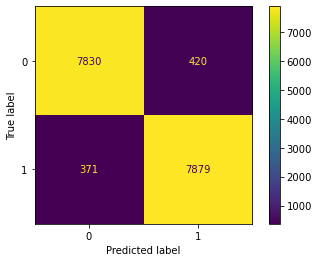

In [30]:
plot_confusion_matrix(estimator= pipe_3,  X= X_test, y_true= y_test);